In [66]:
# lets import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')


The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.




Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)


In [2]:
#read dataset and convert into dataframe

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Each feature is a float data type or we can say continuous except the label which is int64

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


we can see that its a balanced data as there is not such huge variation

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

As we can see there are no null values so we can poceed further

In [16]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Dataset is a bit inbalanced as we can see a less no of wine with a good quality amongst all i.e 7

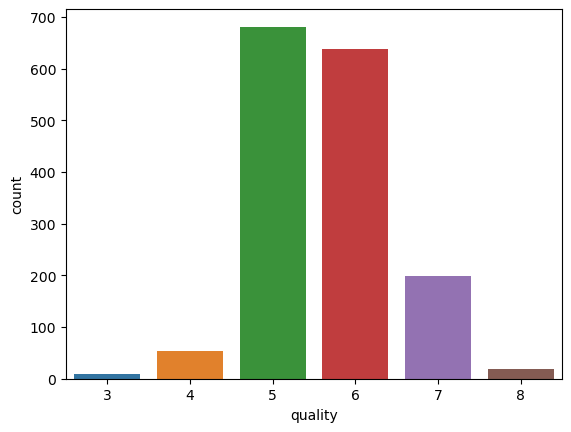

In [17]:
sns.countplot(x='quality',data=data)
plt.show()

using SelectKBest feature selection method

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

In [31]:
x = data.drop('quality', axis=1)
y = data.quality

Preparing dataframe with all the important feature detected

In [32]:
new_x = data[['alcohol','fixed acidity','citric acid','volatile acidity','residual sugar','free sulfur dioxide','chlorides','total sulfur dioxide']]
new_x

,alcohol,fixed acidity,citric acid,volatile acidity,residual sugar,free sulfur dioxide,chlorides,total sulfur dioxide
0,9.4,7.4,0.00,0.700,1.073922,2.223980,0.751010,3.239612
1,9.8,7.8,0.00,0.880,1.112009,2.924018,0.772528,4.061548
2,9.8,7.8,0.04,0.760,1.096963,2.466212,0.767124,3.779763
3,9.8,11.2,0.56,0.280,1.073922,2.571282,0.749906,3.914868
4,9.4,7.4,0.00,0.700,1.073922,2.223980,0.751010,3.239612
...,...,...,...,...,...,...,...,...
1594,10.5,6.2,0.08,0.600,1.080060,3.174802,0.765252,3.530348
1595,11.2,5.9,0.10,0.550,1.091558,3.391211,0.734212,3.708430
1596,11.0,6.3,0.13,0.510,1.096963,3.072317,0.751010,3.419952
1597,10.2,5.9,0.12,0.645,1.080060,3.174802,0.749906,3.530348


In [33]:
new_x.describe()

,alcohol,fixed acidity,citric acid,volatile acidity,residual sugar,free sulfur dioxide,chlorides,total sulfur dioxide
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,10.422983,8.319637,0.270976,0.527821,1.099964,2.397125,0.757517,3.413073
std,1.065668,1.741096,0.194801,0.179060,0.045343,0.535717,0.028510,0.797571
min,8.400000,4.600000,0.000000,0.120000,0.988362,1.000000,0.611752,1.817121
25%,9.500000,7.100000,0.090000,0.390000,1.073922,1.912931,0.744179,2.802039
50%,10.200000,7.900000,0.260000,0.520000,1.091558,2.410142,0.754248,3.361975
75%,11.100000,9.200000,0.420000,0.640000,1.112009,2.758924,0.765252,3.957892
max,14.900000,15.900000,1.000000,1.580000,1.355998,4.160168,0.946731,6.611489


In [34]:
scalar = StandardScaler()
x_scalar = scalar.fit_transform(new_x)

In [35]:
#building model to test unexposed data
x_train, x_test, y_train, y_test = train_test_split(x_scalar, y, test_size=0.25, random_state=355)

In [36]:
#check the accuracy score of different model

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f'Accuracy score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
    
    elif train==False:
        pred = clf.predict(x_test) #
        print(f'Accuracy score: {accuracy_score(y_test, pred) * 100:.2f}%')
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [37]:
knn = KNeighborsClassifier()

#model training
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [38]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True) #training score
metric_score(knn, x_train, x_test, y_train, y_test, train=False) #testing score

Accuracy score: 70.98%
Accuracy score: 57.25%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.13      0.14        15
           5       0.62      0.69      0.65       177
           6       0.56      0.53      0.54       160
           7       0.54      0.44      0.49        45
           8       0.00      0.00      0.00         1

    accuracy                           0.57       400
   macro avg       0.31      0.30      0.30       400
weighted avg       0.56      0.57      0.57       400



It has a good accuracy score with 70%

In [ ]:
#cross validation score 

score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('')

From the above score we can clearly analyze that the feature selected as suitable for making of a good wine as it gives 70% score which is a good score

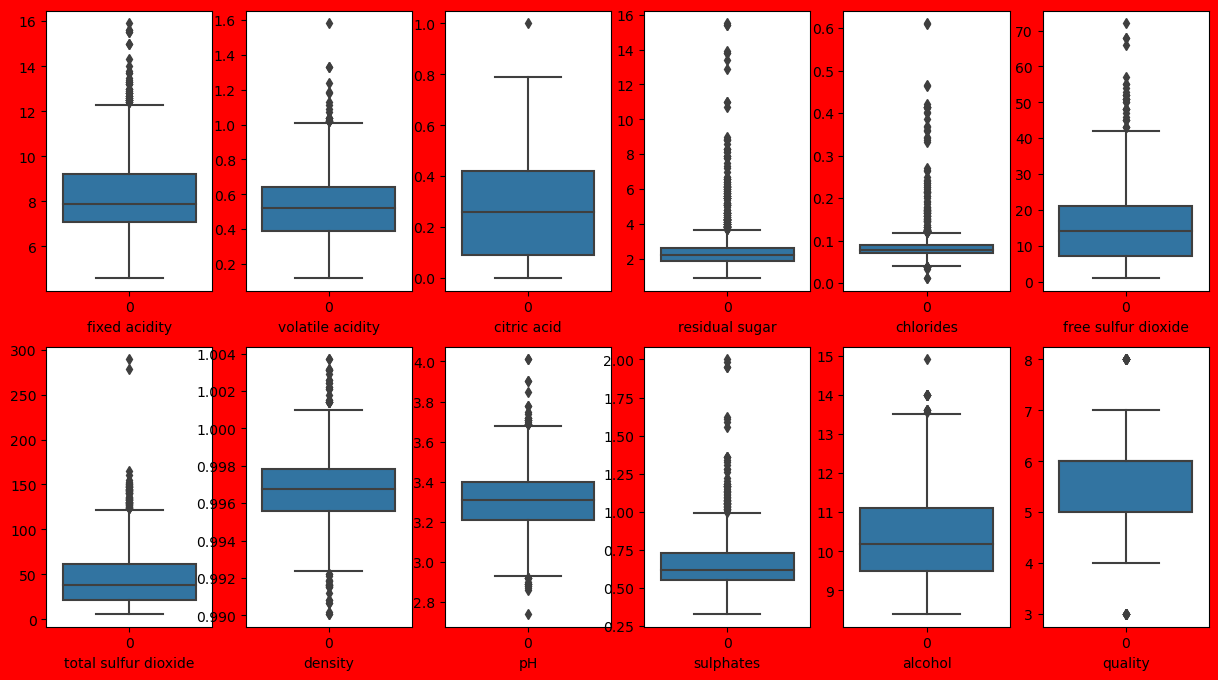

In [5]:
plt.figure(figsize=(15,8), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=14:
        ax = plt.subplot(2,6,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
plt.show()

In [6]:
#we can see the data over here is skewed

data.skew()


fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

The column sulphates, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide have skewness in them so we need to remove it

In [9]:
data['sulphates']=np.cbrt(data['sulphates'])
data['residual sugar']=np.cbrt(data['residual sugar'])
data['chlorides']=np.cbrt(data['chlorides'])
data['free sulfur dioxide']=np.cbrt(data['free sulfur dioxide'])
data['total sulfur dioxide']=np.cbrt(data['total sulfur dioxide'])

we have removed the skewness using cube root method

In [10]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.032658
chlorides               2.191305
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               0.962745
alcohol                 0.860829
quality                 0.217802
dtype: float64

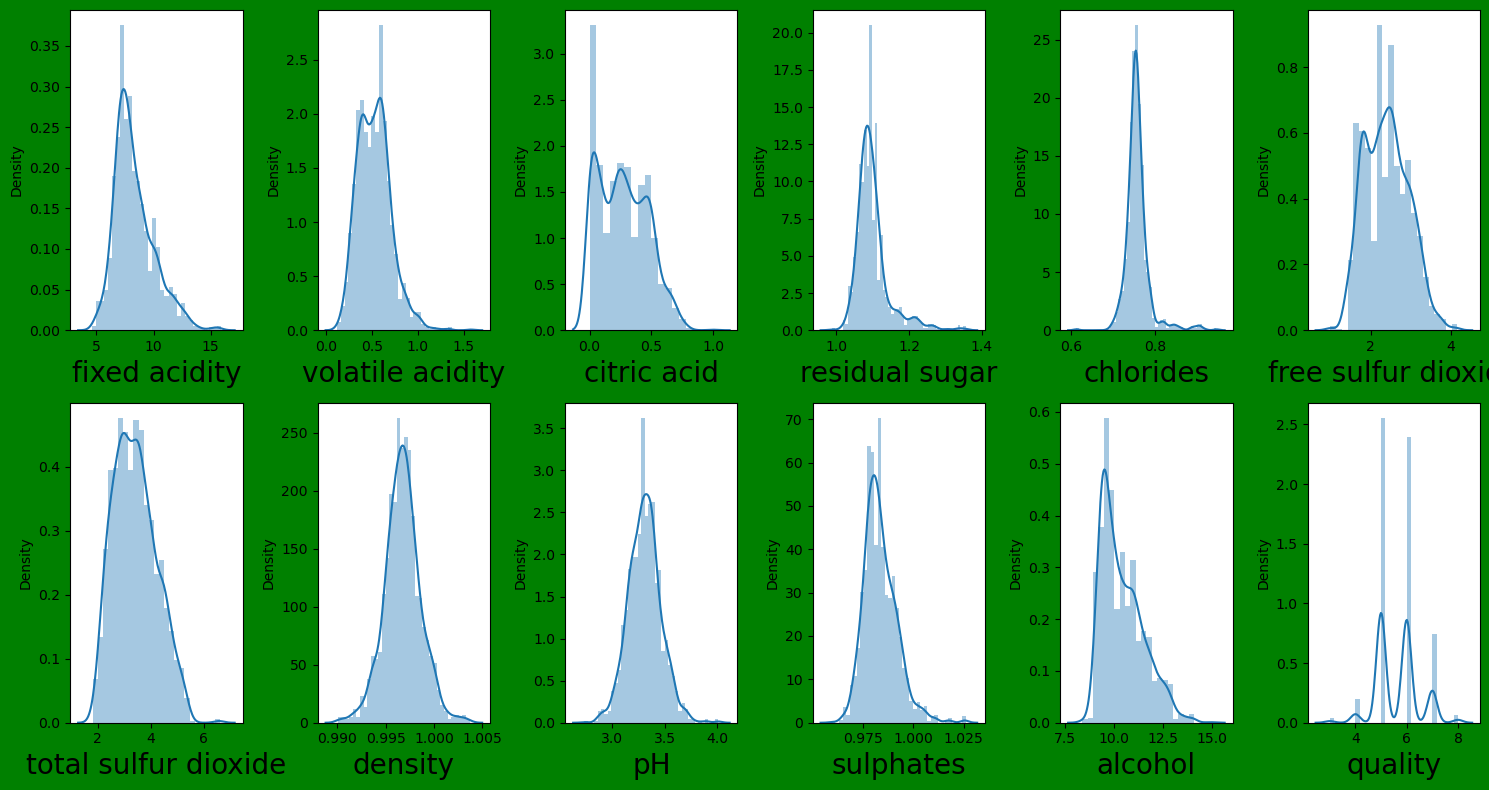

In [39]:
plt.figure(figsize=(15,8), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=14:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [40]:
#checking the correlation between feature and the target.

cor = data.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.169158,0.167078,-0.174701,-0.119267,0.668047,-0.682978,0.203797,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.022261,0.104328,0.006006,0.076637,0.022026,0.234937,-0.299497,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.170254,0.185882,-0.080850,0.009224,0.364947,-0.541904,0.331194,0.109903,0.226373
residual sugar,0.169158,0.022261,0.170254,1.000000,0.109169,0.114658,0.170774,0.412549,-0.091355,0.023372,0.077840,0.022629
chlorides,0.167078,0.104328,0.185882,0.109169,1.000000,-0.010200,0.070256,0.336453,-0.284134,0.254470,-0.296304,-0.171688
free sulfur dioxide,-0.174701,0.006006,-0.080850,0.114658,-0.010200,1.000000,0.757872,-0.036124,0.089701,0.054028,-0.078642,-0.051243
total sulfur dioxide,-0.119267,0.076637,0.009224,0.170774,0.070256,0.757872,1.000000,0.095461,-0.031335,0.039008,-0.226780,-0.180815
density,0.668047,0.022026,0.364947,0.412549,0.336453,-0.036124,0.095461,1.000000,-0.341699,0.165604,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.091355,-0.284134,0.089701,-0.031335,-0.341699,1.000000,-0.155714,0.205633,-0.057731
sulphates,0.203797,-0.299497,0.331194,0.023372,0.254470,0.054028,0.039008,0.165604,-0.155714,1.000000,0.133913,0.306998


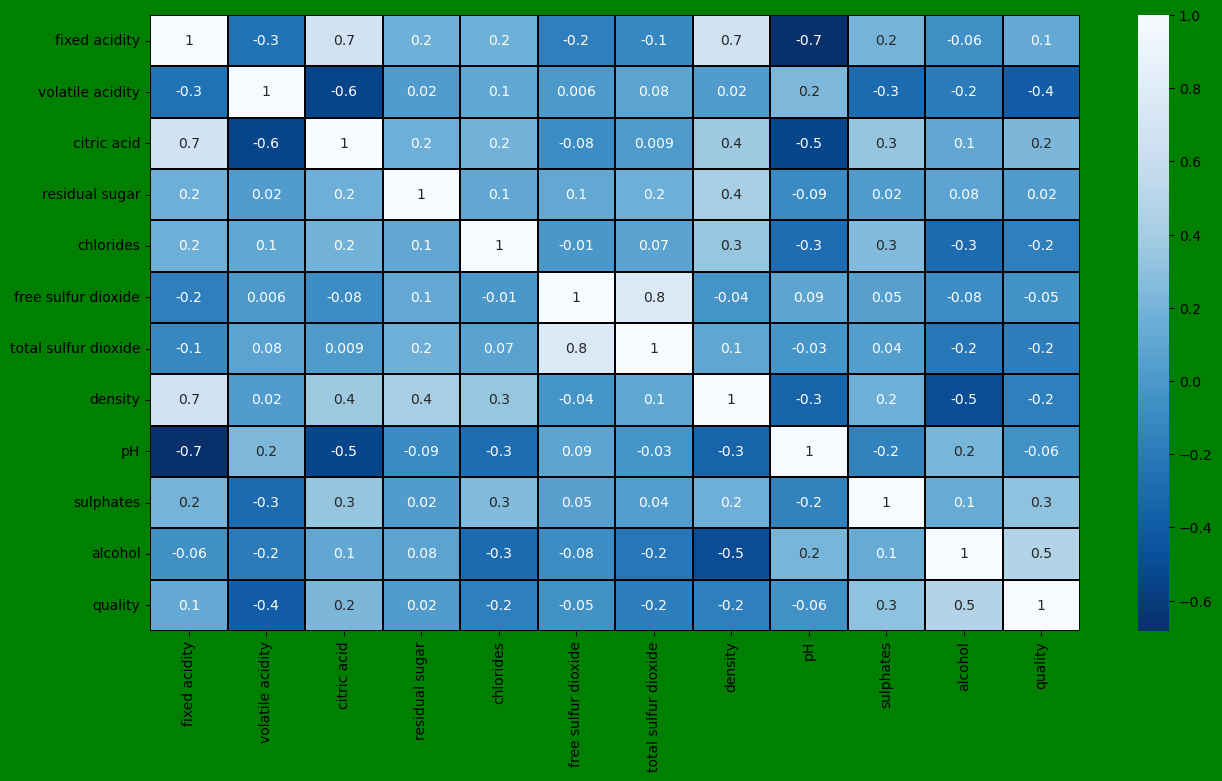

In [14]:

plt.figure(figsize=(15,8), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

This heatmap shows the correlation matrix by visualizing the data. There are not that much positive relation among the target and the feature. 

In [15]:
cor['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.306998
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.022629
free sulfur dioxide    -0.051243
pH                     -0.057731
chlorides              -0.171688
density                -0.174919
total sulfur dioxide   -0.180815
volatile acidity       -0.390558
Name: quality, dtype: float64

In [41]:
x = data.drop('quality', axis=1)
y = data.quality

In [42]:
scalar = StandardScaler()
x_scalar = pd.DataFrame(scalar.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.073922,0.751010,2.223980,3.239612,0.99780,3.51,0.978754,9.4
1,7.8,0.880,0.00,1.112009,0.772528,2.924018,4.061548,0.99680,3.20,0.985818,9.8
2,7.8,0.760,0.04,1.096963,0.767124,2.466212,3.779763,0.99700,3.26,0.984172,9.8
3,11.2,0.280,0.56,1.073922,0.749906,2.571282,3.914868,0.99800,3.16,0.980027,9.8
4,7.4,0.700,0.00,1.073922,0.751010,2.223980,3.239612,0.99780,3.51,0.978754,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,1.080060,0.765252,3.174802,3.530348,0.99490,3.45,0.980027,10.5
1595,5.9,0.550,0.10,1.091558,0.734212,3.391211,3.708430,0.99512,3.52,0.989887,11.2
1596,6.3,0.510,0.13,1.096963,0.751010,3.072317,3.419952,0.99574,3.42,0.989402,11.0
1597,5.9,0.645,0.12,1.080060,0.749906,3.174802,3.530348,0.99547,3.57,0.987395,10.2


We are able to tackle the issue of biasness through standard scalar method

In [43]:
#checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,70.159403,fixed acidity
1,17.088594,volatile acidity
2,8.799688,citric acid
3,691.456531,residual sugar
4,985.665977,chlorides
5,53.819823,free sulfur dioxide
6,54.368437,total sulfur dioxide
7,20735.206631,density
8,1039.253259,pH
9,19512.900994,sulphates


VIF values shows that each feature have have correlation with each other so this show the multicollineraity problem so we will remove the feature 
with high vif value


In [19]:
x.drop('density', axis=1, inplace=True)

In [20]:
x.drop('sulphates', axis=1, inplace=True)

We need to drop the columns to reduce VIF values for the better prediction

In [44]:
#again checking vif to see multicollinearity
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,70.159403,fixed acidity
1,17.088594,volatile acidity
2,8.799688,citric acid
3,691.456531,residual sugar
4,985.665977,chlorides
5,53.819823,free sulfur dioxide
6,54.368437,total sulfur dioxide
7,20735.206631,density
8,1039.253259,pH
9,19512.900994,sulphates


In [23]:
x.drop('pH', axis=1, inplace=True)

In [25]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Here the data is not balanced so we will solve it using oversampling method

In [26]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1 = SM.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [45]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [60]:
from sklearn.ensemble import ExtraTreesClassifier



In [51]:
from sklearn.ensemble import RandomForestClassifier

maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is ", maxAccu,"on random_state",maxRS)

Best accuracy score is  0.8817292006525286 on random_state 178


In [58]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.6645833333333333
[[  0   1   2   0   0   0]
 [  0   0  11   3   0   0]
 [  0   0 158  45   0   0]
 [  0   0  50 127  10   0]
 [  0   0   3  31  34   0]
 [  0   0   0   4   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.71      0.78      0.74       203
           6       0.60      0.68      0.64       187
           7       0.76      0.50      0.60        68
           8       0.00      0.00      0.00         5

    accuracy                           0.66       480
   macro avg       0.34      0.33      0.33       480
weighted avg       0.64      0.66      0.65       480



In [59]:
#cross validation score 

score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Diff b/w accuracy score and cross validation score', accuracy_score(y_test, predRFC)-score.mean())

[0.81540342 0.79069767 0.80293758 0.82619339 0.8127295 ]
0.8095923125035538
Diff b/w accuracy score and cross validation score -0.1450089791702205


In [64]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.6895833333333333
[[  0   1   2   0   0   0]
 [  0   0  11   3   0   0]
 [  0   0 167  34   2   0]
 [  0   0  44 132  11   0]
 [  0   0   4  32  32   0]
 [  0   0   0   4   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.73      0.82      0.77       203
           6       0.64      0.71      0.67       187
           7       0.70      0.47      0.56        68
           8       0.00      0.00      0.00         5

    accuracy                           0.69       480
   macro avg       0.35      0.33      0.33       480
weighted avg       0.66      0.69      0.67       480



In [65]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('Diff b/w accuracy score and cross validation score', accuracy_score(y_test, predET)-score.mean())

[0.83863081 0.78947368 0.81395349 0.8249694  0.8249694 ]
0.8183993559836363
Diff b/w accuracy score and cross validation score -0.128816022650303


In [88]:
def falsepositiverates(fpr,tpr):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
    display.plot()
    


In [87]:
from sklearn import metrics

In [91]:
import pickle
filename='Winequality.pkl'
pickle.dump(ET,open(filename, 'wb'))

In [92]:
import joblib
joblib.dump(ET, 'Winequality.pkl')

['Winequality.pkl']

In [93]:
ET = joblib.load('Winequality.pkl')

prediction = ET.predict(x_test)
prediction

array([6, 6, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 6, 6, 6, 7, 5, 5, 7, 5, 5, 6,
       5, 6, 6, 6, 7, 5, 5, 5, 7, 7, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 7, 5, 5, 5, 6, 6, 6, 5, 6, 5, 4, 7, 6, 5, 5, 5, 5, 6, 6,
       5, 6, 6, 5, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 7, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 7, 6, 6, 5, 7, 6, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 5, 7, 7, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7, 5,
       6, 7, 5, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6,
       5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 7, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5,

In [94]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Original']=a
data

,Predicted,Original
0,6,5
1,6,6
2,5,5
3,6,6
4,6,5
...,...,...
475,5,5
476,6,7
477,6,6
478,5,5


So this is the predicted and the original score based on the classification model